In [14]:
import pandas as pd
import os
import numpy as np

In [34]:
path = os.path.abspath('')
path = path + "/engineered_data_250ms_window80_step8.csv"
df = pd.read_csv(path)

diction = {'Dany':0, 'Felix':1, 'Julian':2, 'Mark':3,'Martin':4,'Michele':5,'Paul':6}

for index,row in df['Participant'].items():
    df.loc[index,'Participant'] = diction[row]

List = ["Window", "Participant", "Run", "Path"]
for name in df.columns:
    if "Acceleration" in name and not "Linear" in name:
        List.append(name)

df.drop(df.columns.difference(List),axis=1,inplace=True)
print(df.columns)

df['Path'] = df['Path'].replace({'straight': 0, 'circle': 1})
unique_values = df['Path'].unique()
print("Unique values in the 'path' column:", unique_values)
sample_values = df['Path'].sample(n=10, random_state=1)  # random_state ensures reproducibility
print("Sample of the 'path' column:\n", sample_values)

Index(['Window', 'Participant', 'Path', 'Run',
       'median_Acceleration x (m/s^2)_head_mean',
       'median_Acceleration x (m/s^2)_head_std',
       'median_Acceleration x (m/s^2)_head_last',
       'median_Acceleration x (m/s^2)_head_get_freq',
       'median_Acceleration x (m/s^2)_head_get_weighted_freq',
       'median_Acceleration x (m/s^2)_head_get_power_spectral_entropy',
       'median_Acceleration y (m/s^2)_head_mean',
       'median_Acceleration y (m/s^2)_head_std',
       'median_Acceleration y (m/s^2)_head_last',
       'median_Acceleration y (m/s^2)_head_get_freq',
       'median_Acceleration y (m/s^2)_head_get_weighted_freq',
       'median_Acceleration y (m/s^2)_head_get_power_spectral_entropy',
       'median_Acceleration z (m/s^2)_head_mean',
       'median_Acceleration z (m/s^2)_head_std',
       'median_Acceleration z (m/s^2)_head_last',
       'median_Acceleration z (m/s^2)_head_get_freq',
       'median_Acceleration z (m/s^2)_head_get_weighted_freq',
       'med

In [77]:
#create train/test set
# Split data based on 'Run' for training and testing
X_Train = df[df['Run'] < 4].copy()
X_Test = df[df['Run'] == 4].copy()

# Extracting targets
Y_Train = X_Train.pop('Participant')
Y_Test = X_Test.pop('Participant')

# Verifying the final shapes and content of datasets
print("X_Train shape:", X_Train.shape)
print("X_Test shape:", X_Test.shape)
print("Y_Train shape:", Y_Train.shape)
print("Y_Test shape:", Y_Test.shape)

#Display a few rows to confirm correct data setup
print(X_Train['Path'].sample(3))
print(X_Test['Path'].sample(3))

# In order to solve the NaN issue, i try to locate the values
print("NaN in X_Train:", X_Train.isnull().sum().sum())
print("NaN in Y_Train:", Y_Train.isnull().sum().sum())
print("NaN in X_Test:", X_Test.isnull().sum().sum())

# Find rows with NaN values in X_Train
nan_rows_X_Train = X_Train[X_Train.isnull().any(axis=1)]
print("Rows with NaN values in X_Train:")
print(nan_rows_X_Train)

# Find rows with NaN values in X_Test
nan_rows_X_Test = X_Test[X_Test.isnull().any(axis=1)]
print("Rows with NaN values in X_Test:")
print(nan_rows_X_Test)

# Print the number of unique rows that have NaN in X_Train and X_Test
print("Number of unique rows with NaN in X_Train:", nan_rows_X_Train.shape[0])
print("Number of unique rows with NaN in X_Test:", nan_rows_X_Test.shape[0])

# In order to solve the NaN issue in the SVM I will drop the the NaN values 
# Remove rows with NaN values from X_Train and X_Test
X_Train_cleaned = X_Train.dropna()
X_Test_cleaned = X_Test.dropna()

# Ensure the target variables are aligned
Y_Train_cleaned = Y_Train[X_Train_cleaned.index]
Y_Test_cleaned = Y_Test[X_Test_cleaned.index]

# Ensure Y_Train_cleaned and Y_Test_cleaned is of integer type
Y_Train_cleaned = Y_Train_cleaned.astype(int)
Y_Test_cleaned = Y_Test_cleaned.astype(int)

X_Train shape: (1019, 21)
X_Test shape: (287, 21)
Y_Train shape: (1019,)
Y_Test shape: (287,)
948    1
704    0
75     1
Name: Path, dtype: int64
610    0
813    1
239    0
Name: Path, dtype: int64
NaN in X_Train: 1380
NaN in Y_Train: 0
NaN in X_Test: 255
Rows with NaN values in X_Train:
      Window  Path  Run  median_Acceleration x (m/s^2)_head_mean  \
15        16     1    1                                -2.147170   
16        17     1    1                                -2.186962   
17        18     1    1                                -2.298860   
18        19     1    1                                -2.391976   
19        20     1    1                                -2.442028   
...      ...   ...  ...                                      ...   
1179      45     1    3                                      NaN   
1180      46     1    3                                      NaN   
1205       1     0    1                                 0.636521   
1239       1     0    2        

In [66]:
# Check for NaN values in Y_Train
print("NaN in Y_Train:", Y_Train_cleaned.isnull().sum().sum())
print("NaN in Y_Train:", Y_Test_cleaned.isnull().sum().sum())

# Check the unique values in Y_Train
print("Unique values in Y_Train:", Y_Train_cleaned.unique())
print("Unique values in Y_Train:", Y_Test_cleaned.unique())



NaN in Y_Train: 0
NaN in Y_Train: 0
Unique values in Y_Train: [0 1 2 3 4 5 6]
Unique values in Y_Train: [0 1 2 3 4 5 6]


In [76]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_Train_scaled = scaler.fit_transform(X_Train_cleaned)

# Transform the test data
X_Test_scaled = scaler.transform(X_Test_cleaned)

# Using the scaled data for training and prediction
# Define and train the RBF kernel SVM model
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf.fit(X_Train_scaled, Y_Train_cleaned)

# Define and train the polynomial kernel SVM model with degree 20
poly = svm.SVC(kernel='poly', degree=20, C=1)
poly.fit(X_Train_scaled, Y_Train_cleaned)

# Define and train the linear kernel SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_Train_scaled, Y_Train_cleaned)

# Make predictions on the test set using all three models
y_pred_rbf = rbf.predict(X_Test_scaled)
y_pred_poly = poly.predict(X_Test_scaled)
y_pred_linear = clf.predict(X_Test_scaled)

print("RBF Kernel SVM Predictions:", y_pred_rbf)
print("Polynomial Kernel SVM Predictions:", y_pred_poly)
print("Linear Kernel SVM Predictions:", y_pred_linear)

RBF Kernel SVM Predictions: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]
Polynomial Kernel SVM Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 2 2 2 2 2 2 0 0 2 0 0 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [75]:
# Print the predictions and accuracy from all three models
print("Accuracy (RBF):", metrics.accuracy_score(Y_Test_cleaned, y_pred_rbf))

print("Accuracy (Polynomial):", metrics.accuracy_score(Y_Test_cleaned, y_pred_poly))

print("Accuracy (Linear):", metrics.accuracy_score(Y_Test_cleaned, y_pred_linear))

Accuracy (RBF): 0.08812260536398467
Accuracy (Polynomial): 0.41762452107279696
Accuracy (Linear): 0.9003831417624522


Accuracy: 0.9157088122605364


<Axes: >

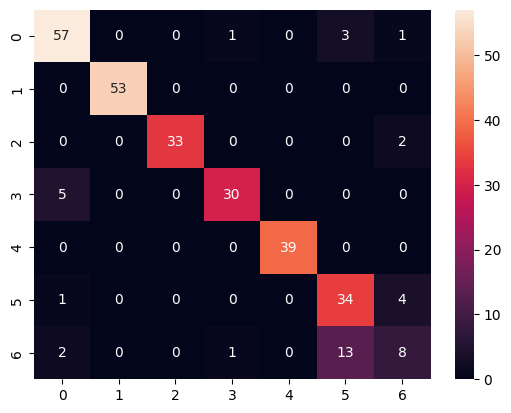

In [72]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
model = XGBClassifier(tree_method = 'hist',objective='multi:softprob')
model.fit(X_Train_cleaned,Y_Train_cleaned)
y_pred_XGBC = model.predict(X_Test_cleaned)
Y_Test = Y_Test.astype('int')
print("Accuracy:",metrics.accuracy_score(Y_Test_cleaned , y_pred_XGBC))

cm = confusion_matrix(Y_Test,y_pred)
sns.heatmap(cm,annot=True)

In [41]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, X_Test, Y_Test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
feature_names = [f"feature {i}" for i in range(X_Train.shape[1])]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.429 seconds


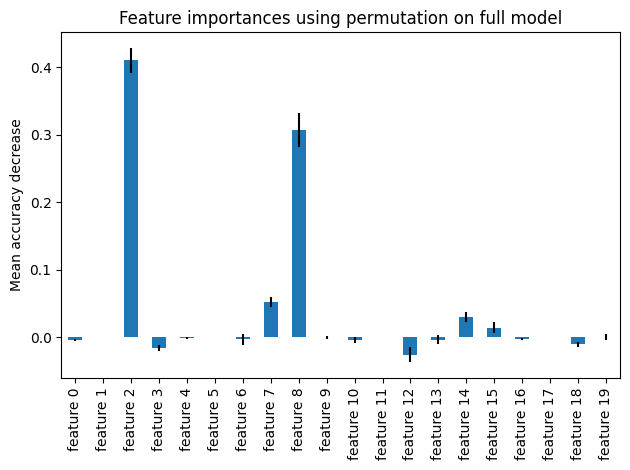

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()